# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [21]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 0., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.csv'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

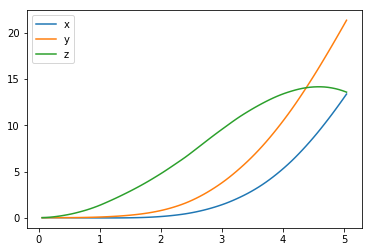

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

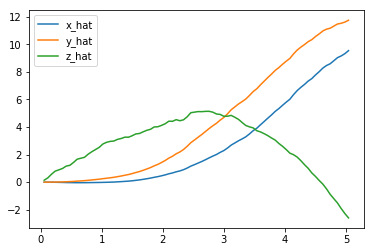

In [23]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

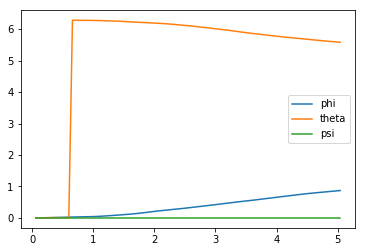

In [24]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

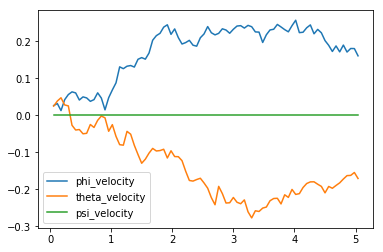

In [25]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

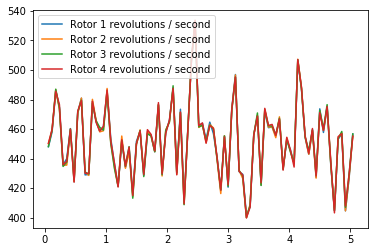

In [26]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [27]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[13.38565278 21.3771491  13.59164552  0.8698066   5.58219504  0.        ]
[ 9.5421154  11.74733469 -2.59467406]
[ 0.16127098 -0.17023554  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [28]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  -0.740 (best =  -0.169), noise_scale = 3.2625

This agent should perform very poorly on this task.  And that's where you come in!

### Testing with Open AI Gym - MountainCarContinous v0

Since I was having trouble teaching the quadcopter to take off/hover, I tried this Open AI gym environment and was able to achieve a reward > 90 and [thus solve this environment](https://github.com/openai/gym/wiki/MountainCarContinuous-v0#solved-requirements).

In [197]:
import time
import gym
from task_mountain_car import TaskMountainCar

task = TaskMountainCar(gym.make('MountainCarContinuous-v0'))
agent = DDPG(task)
rewards = []
for i_episode in range(1, 11):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state)
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        if done:
            rewards.append(reward)
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f})".format(
                i_episode, agent.score, agent.best_score), end="")  # [debug]
            rewards.append(reward)
            break            
    sys.stdout.flush()

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Episode =   10, score =  97.750 (best =  98.088)

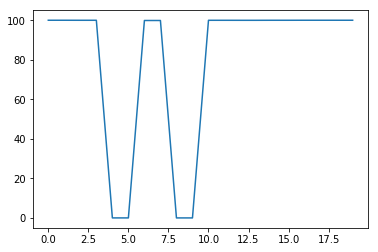

In [198]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(rewards)

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [227]:
%load_ext autoreload
%autoreload 2

## TODO: Train your agent here.
import sys
import pandas as pd
import numpy as np
from task import Task
from agents.agent import DDPG

num_episodes = 250
rewards = []

# Take off
init_pose=np.array([0.0, 0.0, 10.0, 0.0, 0.0, 0.0])
target_pose=np.array([0.0, 0.0, 30.0, 0.0, 0.0, 0.0])

# Hover
# init_pose=np.array([0.0, 0.0, 10.0, 0.0, 0.0, 0.0])
# target_pose=np.array([0.0, 0.0, 10.0, 0.0, 0.0, 0.0])

task = Task(init_pose=init_pose, 
            init_velocities=np.array([0.0, 0.0, 0.0]), 
            init_angle_velocities=np.array([0.0, 0.0, 0.0]),
            runtime=5., 
            target_pose=target_pose)
agent = DDPG(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f})".format(
                i_episode, agent.score, agent.best_score), end="")  # [debug]
            rewards.append(reward)
            break
    sys.stdout.flush()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Episode =  250, score = -276.836 (best = -200.418)

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

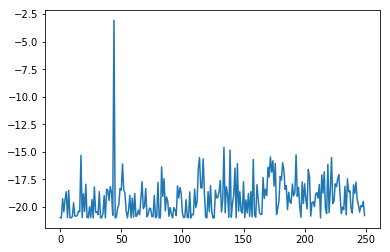

In [228]:
## TODO: Plot the rewards.
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(rewards)

In [237]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

file_output = 'data_ddpg.csv'                         # file name for saved results

# Setup
# task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
# agent = Basic_Agent(task)
# done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}
num_episodes = 10

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    state = agent.reset_episode()
    for i in range(num_episodes):
        while True:
            rotor_speeds = agent.act(state)
            _, _, done = task.step(rotor_speeds)
            to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
            for ii in range(len(labels)):
                results[labels[ii]].append(to_write[ii])
            writer.writerow(to_write)
            if done:
                break

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

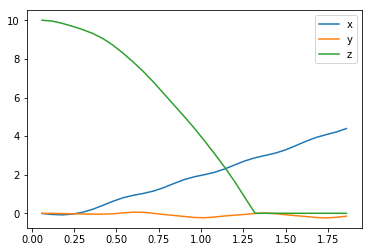

In [239]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

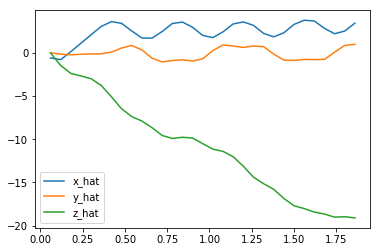

In [240]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

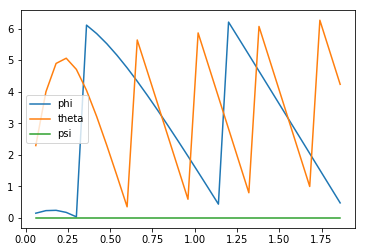

In [241]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

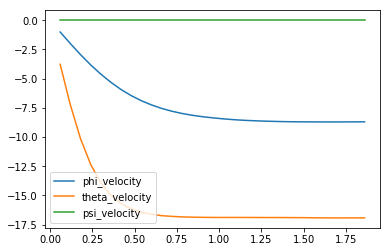

In [242]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

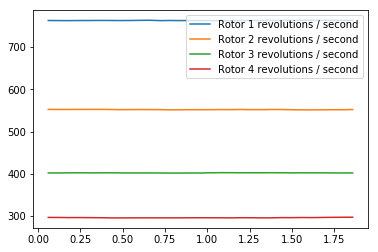

In [243]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**: I tried two different tasks but wasn't able to train the quadcopter successfully.

**Hover (commented out)**
I tried to make the quadcopter hover near the inital position by using this reward function.

Whenever the quadcopter was within 3 units of the target position, a reward of 10 applied.
When it was beyond this distance, there was some punishment in the range (-1, 0) (using tanh) and proportional to the distance away from the target position.

In addition to the above, I tried to discourage rotation using punishments in the same range as before as can be seen in the code snippet below. 

```python
punishments = []
dist = abs(np.linalg.norm(self.target_pose[:3] - self.sim.pose[:3]))

# Reward 10 for staying within a distance of 3
if dist < 3:
    punishments.append(-10)
# Punish upto -1 for going beyond a distance of 3
else:
    punishments.append(np.tanh(dist))

# Punish upto -1 each for rotating or having any velocity
punishments.append(np.tanh(np.linalg.norm(self.sim.pose[3:6])))
punishments.append(np.tanh(np.linalg.norm(self.sim.v)))
reward = -sum(punishments)
return reward
```

**Take off**

For the take off task, I tried to punish any movements along x and y with values in the range (-1, 0) just like before.

For the z axis, I gave some extra weight to the reward/punishment as I felt this was the most important thing for the quadcopter to learn. I used the difference between the current position along the z axis and the initial position - this would be positive if the quadcopter is moving up and negative otherwise.

I tried to discourage rotation by adding a value between (-1, 0) for any rotation along each of the axes.

```python
# Punish upto -1 each for moving away from x, y coordinates
punish_x = np.tanh(abs(self.sim.pose[0] - self.target_pose[0]))
punish_y = np.tanh(abs(self.sim.pose[1] - self.target_pose[1]))

# Similar to above but with more weightage since with this more important
# This is positive when current position is > initial position and negative when not
reward_z = 3*np.tanh(self.sim.pose[2] - self.init_z)

# Punish upto -1 for rotating
punish_rot1 = np.tanh(abs(self.sim.pose[3]))
punish_rot2 = np.tanh(abs(self.sim.pose[4]))
punish_rot3 = np.tanh(abs(self.sim.pose[5]))
reward = reward_z - punish_x - punish_y - punish_rot1 - punish_rot2 - punish_rot3
print(reward)
return reward
```

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

I chose the recommended [Deep Deterministic Policy Gradient](https://arxiv.org/pdf/1509.02971.pdf) (DDPG) algorithm. After trying many permutations of hyperparemeters, I chose the ones specified in 7 Experiment Details section of the linked paper:

```python
# Noise process
self.exploration_mu = 0
self.exploration_theta = 0.15
self.exploration_sigma = 0.2

# Replay memory
self.buffer_size = 1000000
self.batch_size = 64

# Algorithm parameters
self.gamma = 0.99  # discount factor
self.tau = 0.001  # for soft update of target parameters
```

I tweaked the recommended architecture with these changes based on the above paper.
Learning rates of Adam optimizer
- Actor - 0.0001
- Critic - 0.001

Final layer weights were initialized from a uniform distribution in the below ranges
- Actor - [-0.003, 0.003]
- Critic - [-0.0003, 0.0003] 

Summaries of the architecture of the actor and critic with the layers, sizes and activation functions are printed below. The only addition to each from the recommended architecure is a batch normalization layer in between.

In [224]:
%load_ext autoreload
%autoreload 2

from task import Task
from agents.agent import DDPG

# Take off
init_pose=np.array([0.0, 0.0, 10.0, 0.0, 0.0, 0.0])
target_pose=np.array([0.0, 0.0, 30.0, 0.0, 0.0, 0.0])

task = Task(init_pose=init_pose, 
            init_velocities=np.array([0.0, 0.0, 0.0]), 
            init_angle_velocities=np.array([0.0, 0.0, 0.0]),
            runtime=5., 
            target_pose=target_pose)
agent = DDPG(task) 


# Actor
# Hidden layers activation function: relu
# Output layer activation function: sigmoid
print(agent.actor_local.model.summary())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
states (InputLayer)          (None, 18)                0         
_________________________________________________________________
dense_690 (Dense)            (None, 32)                608       
_________________________________________________________________
dense_691 (Dense)            (None, 64)                2112      
_________________________________________________________________
dense_692 (Dense)            (None, 32)                2080      
_________________________________________________________________
batch_normalization_214 (Bat (None, 32)                128       
_________________________________________________________________
raw_actions (Dense)          (None, 4)                 132       
______________________________________________________

In [225]:
# Critic
# Activation function: relu
print(agent.critic_local.model.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
states (InputLayer)             (None, 18)           0                                            
__________________________________________________________________________________________________
actions (InputLayer)            (None, 4)            0                                            
__________________________________________________________________________________________________
dense_696 (Dense)               (None, 32)           608         states[0][0]                     
__________________________________________________________________________________________________
dense_698 (Dense)               (None, 32)           160         actions[0][0]                    
__________________________________________________________________________________________________
dense_697 

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:
Based on the plot of the rewards over episodes above, it doesn't look like the quadcopter was able to learn how to take off. After the amount of tweaking I did with no success, this was a very hard task for me to teach the quadcopter.

The quadcopter seemed to learn a lot suddenly around episode 45 but couldn't retain this. There was some gradual learning after this but not enough.

The performance was not as good as the best performance.
The best reward for an episode was around -3 but towards the end this was around -18.


**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

The hardest part was setting up a suitable reward function for the agent to start learning the task. Though tweaking the parameters changed the performance, this wasn't much as I was using parameters very close to the ones specified in the DDPG paper.

At one point during my experimentation, the quadcopter seemed to land smoothly even though I had set up the task for the agent to learn take off. This did make sense because of the way I was calculating the reward. I then started rewarding the height of the quadcopter a little bit more to avoid this.    

Most times, though the rewards seemed to go up over a number of episodes, the trained model failed to perform the necessary task during the simulation.    

After a long time tweaking the parameters and reward function with not much success, I validated the architecture with Open AI gym's mountain car environment and was able to solve it.

I did some more tweaking after that but still don't have a quadcopter that can hover or take off.

However, there was a lot of great material and my understanding of deep reinforcement learning grew because of the time I spent on this project. I hope to apply this knowledge to different environments in the Open AI gym and other applications in the future.

